## Part 3: Exploratory Data Analysis on SAVEE  Dataset


[Surrey Audio-Visual Expressed Emotion (SAVEE)Database](http://personal.ee.surrey.ac.uk/Personal/P.Jackson/SAVEE/Database.html)

***Description***

The SAVEE database was recorded from four native English male speakers (identified as DC, JE, JK, KL), postgraduate students and researchers at the University of Surrey aged from 27 to 31 years. Emotion has been described psychologically in discrete categories: anger, disgust, fear, happiness, sadness and surprise. This is supported by the cross-cultural studies of Ekman [6] and studies of automatic emotion recognition tended to focus on recognizing these [12]. We added neutral to provide recordings of 7 emotion categories. The text material consisted of 15 TIMIT sentences per emotion: 3 common, 2 emotion-specific and 10 generic sentences that were different for each emotion and phonetically-balanced. The 3 common and 2 × 6 = 12 emotion-specific sentences were recorded as neutral to give 30 neutral sentences. This resulted in a total of 120 utterances per speaker, for example:

- Common: She had your dark suit in greasy wash water all year. 
- Anger: Who authorized the unlimited expense account? 
- Disgust: Please take this dirty table cloth to the cleaners for me. 
- Fear: Call an ambulance for medical assistance. 
- Happiness: Those musicians harmonize marvelously. 
- Sadness: The prospect of cutting back spending is an unpleasant one for any governor. 
- Surprise: The carpet cleaners shampooed our oriental rug. 
- Neutral: The best way to learn is to solve extra problems.

The distribution includes a complete list of sentences.

In [26]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#to list the files
from glob import glob


from IPython.display import Audio
import librosa

import librosa.display
from sklearn.preprocessing import scale


In [28]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
def get_files(dir):
    
    files = glob(dir + '*/*.wav')
    print(f"{dir} file counts : ", len(files))
        
    return files

In [3]:
def play_librosa(wav_file, source='None'):
    
    print("WAV: ", wav_file)
    
    audio, sfreq = librosa.load(wav_file)
    time = np.arange(0, len(audio)) / sfreq

    print('Sample Rate:', sfreq)
    
    fig, ax = plt.subplots()
    ax.plot(time, audio)
    ax.set(xlabel='Time (sec)',  ylabel='Sound Amplitude')

    return Audio(data=audio, rate=sfreq)

In [4]:
#define hte directories/paths
savee_rootdir = './raw_source/Savee/'

In [5]:
#get the files
savee =  get_files(savee_rootdir)

./raw_source/Savee/ file counts :  480


## Let's hear and visualize sample

WAV:  ./raw_source/Savee/KL/n17.wav
Sample Rate: 22050


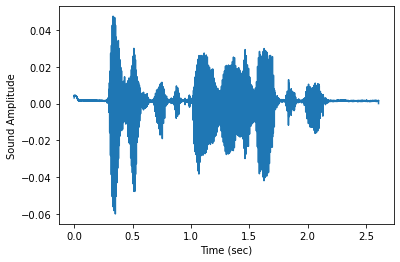

In [6]:
#testing the  WAV  from Tess
play_librosa(savee[0])

## Processing SAVEE 


***The audio files in this dataset are named in such a way that the prefix letters describes the emotion classes as follows:***

- 'a' = 'anger'
- 'd' = 'disgust'
- 'f' = 'fear'
- 'h' = 'happiness'
- 'n' = 'neutral'
- 'sa' = 'sadness'
- 'su' = 'surprise'

In [7]:
#lets generate some analysis on the .wav files by getting the audio and the sample rate

savee_label = []
savee_sr = []
savee_audio = []

for s in savee:
    
    filename= s.split('/')
    label = filename[4]
    
    if label[0] == 'a':
        savee_label.append('angry')
    elif label[0] == 'd':
        savee_label.append('disgust')
    elif label[0] == 'f':
        savee_label.append('fearful')
    elif label[0] == 'h':
        savee_label.append('happy')
    elif label[0] == 'n':
        savee_label.append('neutral')
    elif label[0:2] == 'sa':
        savee_label.append('sad')
    elif label[0:2] == 'su':
        savee_label.append('surprised')
    else:
         savee_label.append('unknown')
        
    #librosa output
    audio, sr = librosa.load(s)
    
    
    savee_audio.append(audio)
    savee_sr.append(sr)

In [8]:
#convert the data into dataframe

data = {'file':savee, 
        'emotion':savee_label, 
        'audio':savee_audio,
        'sr': savee_sr}
df_savee = pd.DataFrame(data)

In [9]:
#lets check if the dataframe is successfully created
df_savee.head()

,file,emotion,audio,sr
0,./raw_source/Savee/KL/n17.wav,neutral,"[0.0030764234, 0.004542443, 0.0040014894, 0.00...",22050
1,./raw_source/Savee/KL/n03.wav,neutral,"[0.001160853, 0.0016819717, 0.0014848977, 0.00...",22050
2,./raw_source/Savee/KL/h05.wav,happy,"[0.0009788524, 0.0014617544, 0.0013325788, 0.0...",22050
3,./raw_source/Savee/KL/sa04.wav,sad,"[0.0011470135, 0.0017000062, 0.001544478, 0.00...",22050
4,./raw_source/Savee/KL/h11.wav,happy,"[0.00397437, 0.0058874376, 0.0052202633, 0.005...",22050


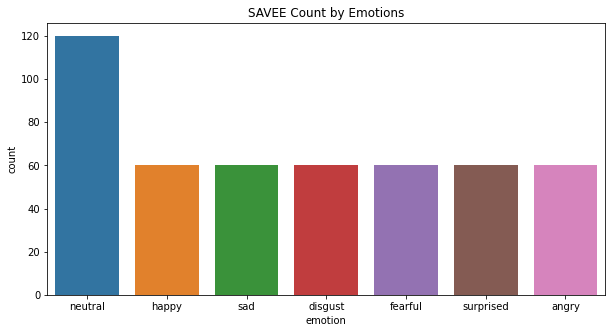

In [10]:
#distribution of the data
plt.figure(figsize=(10,5))
sns.countplot(data = df_savee, x="emotion")
plt.title("SAVEE Count by Emotions")
plt.savefig("./image/savee_dist.png")

***evenly distributed except for neutral***

In [11]:
#sample rate is consistent to be 22KHz
df_savee["sr"].unique()

array([22050])

In [12]:
#check the lenght of the audio file
df_savee["audio_len"] = df_savee["audio"].map(lambda x: len(x))

In [13]:
#create a time period, how many seconds per wav file
df_savee["audio_freq"] = df_savee["audio_len"] / df_savee["sr"]

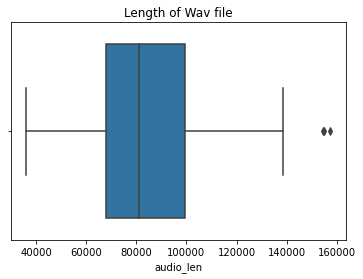

In [14]:
sns.boxplot(data = df_savee, x="audio_len")
plt.title("Length of Wav file");

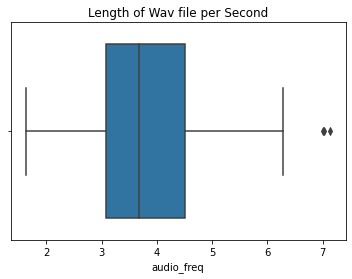

In [15]:
sns.boxplot(data = df_savee, x="audio_freq")
plt.title("Length of Wav file per Second");
plt.savefig("./image/savee_box.png")

*The average length of audio is between 3 to 4 seconds*

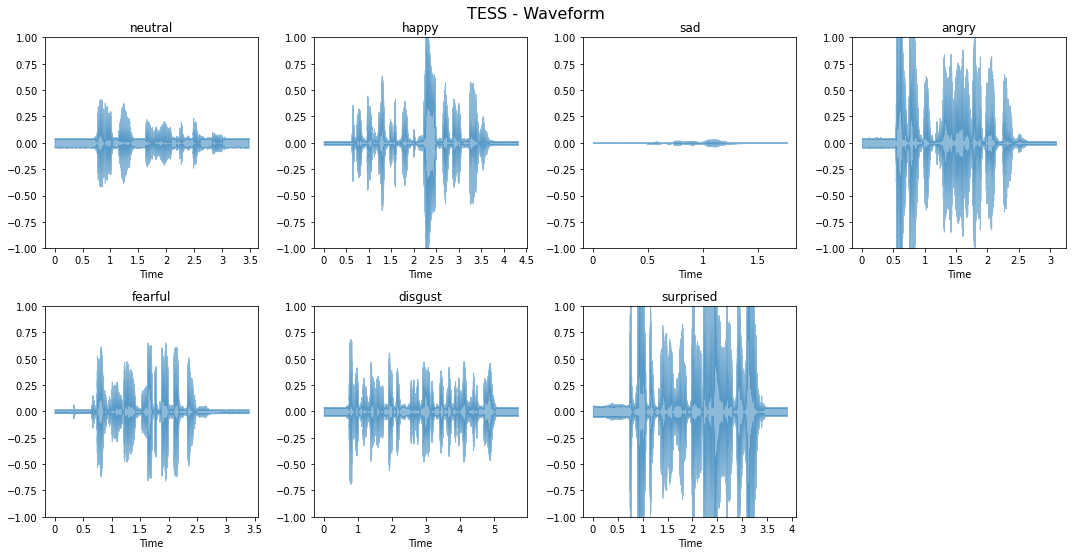

In [16]:
#Visualize hte waveform

ls_emotion = ["neutral", "happy", "sad","angry", "fearful", "disgust","surprised"]
viz_normal= []

for emo in ls_emotion:
    viz_normal.append(df_savee[(df_savee["emotion"] == emo)].sample(n=1).iloc[0])

plt.figure(figsize=(15, 15))

for x in range(len(viz_normal)):
    plt.subplot(4,4,x+1)
    librosa.display.waveshow(viz_normal[x]["audio"], sr=viz_normal[x]["sr"],alpha=0.5)
    plt.title(viz_normal[x]["emotion"])
    plt.ylim((-1, 1))

plt.suptitle("TESS - Waveform", size=16);
plt.tight_layout()
plt.savefig("./image/savee_intensity_all.png")

## Calculating amplitude envelope

In [17]:
def fancy_amplitude_envelope(signal, frame_size, hop_length):
    """Fancier Python code to calculate the amplitude envelope of a signal with a given frame size."""
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])
    

In [18]:
FRAME_SIZE = 512
HOP_LENGTH = 256

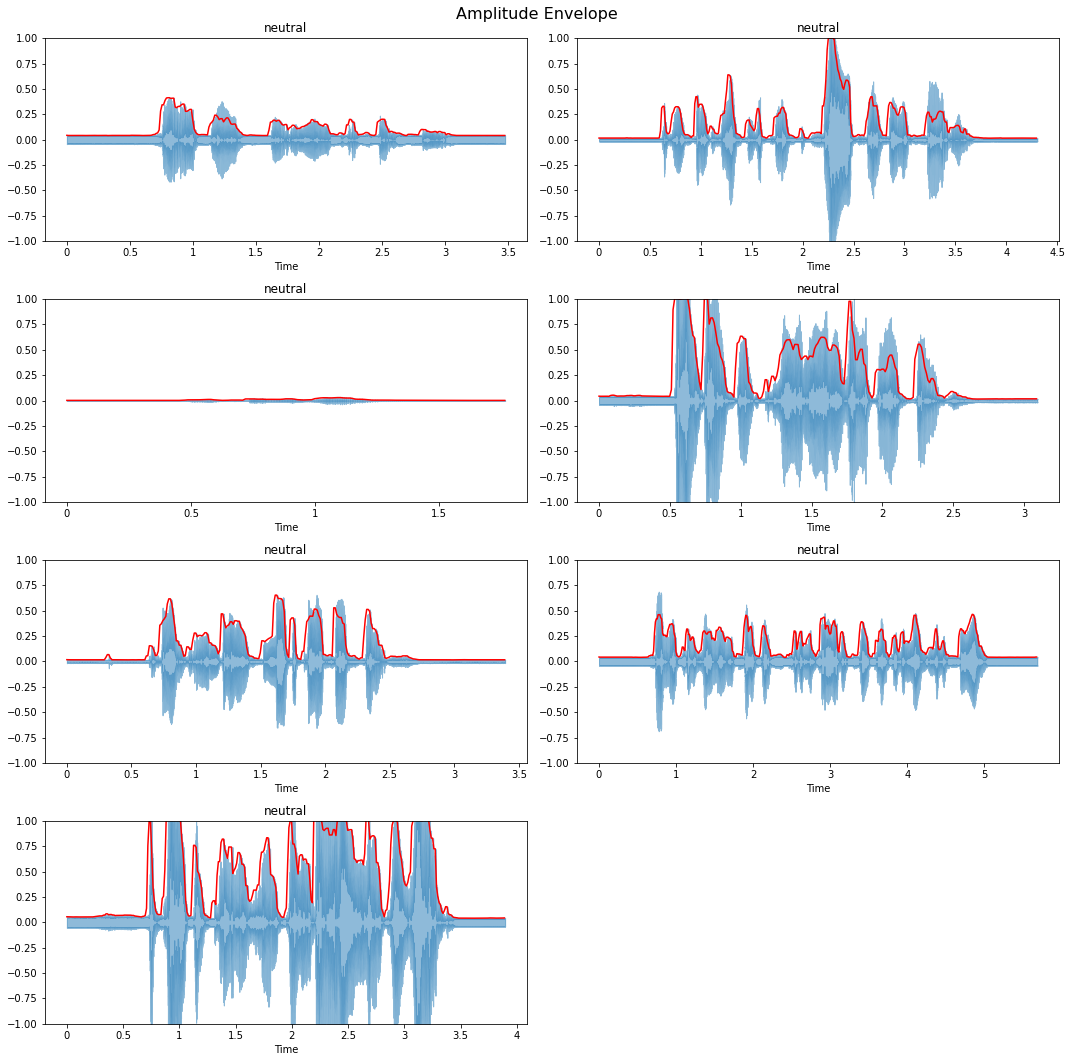

In [19]:

plt.figure(figsize=(15, 15))

for x in range(len(viz_normal)):
    plt.subplot(4,2,x+1)
    librosa.display.waveshow(viz_normal[x]["audio"], sr=viz_normal[x]["sr"],alpha=0.5)
    
    ae_normal = fancy_amplitude_envelope(viz_normal[x]["audio"], FRAME_SIZE, HOP_LENGTH)
    
    frames = range(len(ae_normal))
    t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
    plt.plot(t, ae_normal, color="r")

    plt.title(viz_normal[0]["emotion"])
    plt.ylim((-1, 1))

plt.suptitle("Amplitude Envelope", size=16);
plt.tight_layout()


## RMSE (ROOT MEAN SQUARE ENERGY)


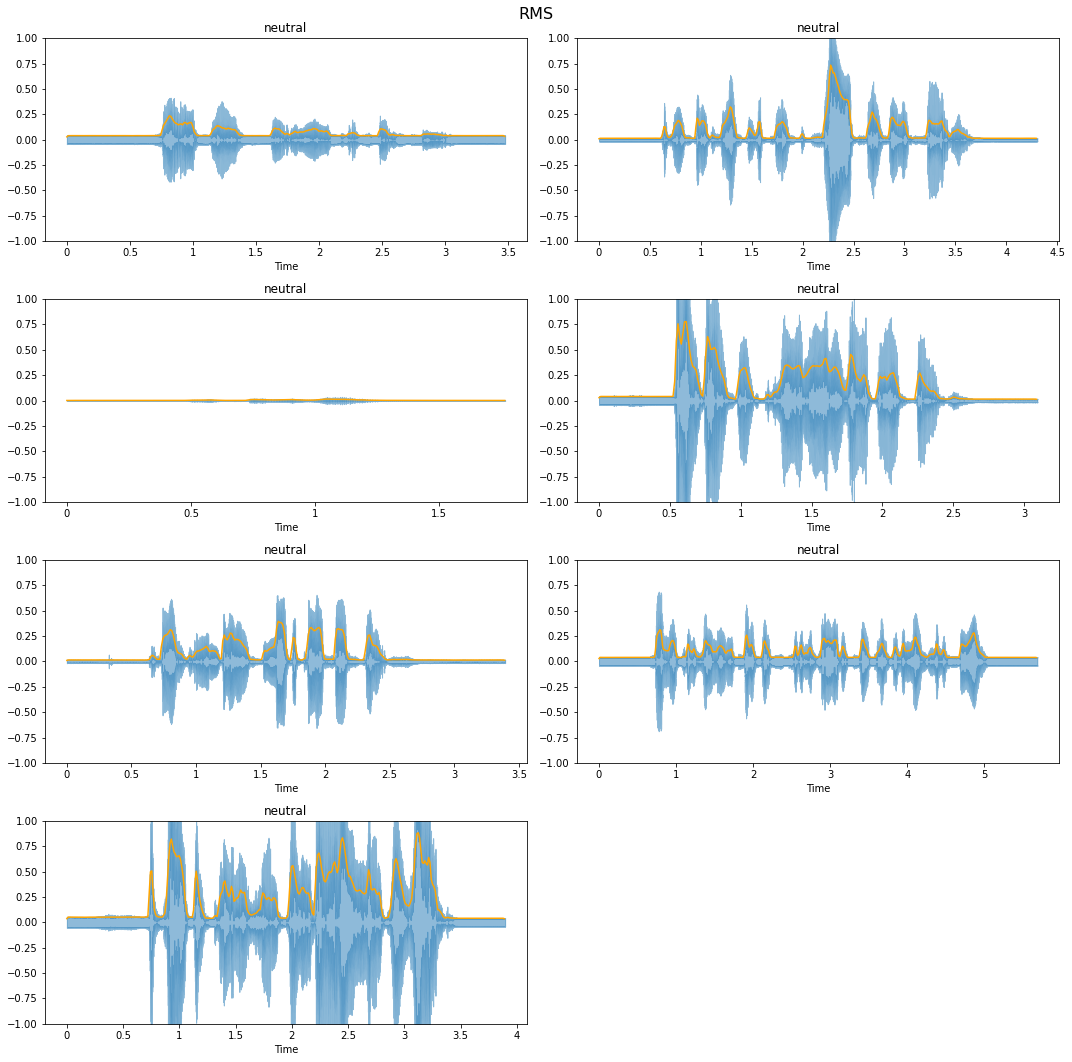

In [20]:

plt.figure(figsize=(15, 15))

for x in range(len(viz_normal)):
    plt.subplot(4,2,x+1)
    librosa.display.waveshow(viz_normal[x]["audio"], sr=viz_normal[x]["sr"],alpha=0.5)
    
    rmse = librosa.feature.rms(y=viz_normal[x]["audio"], frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)
    
    frames = range(len(rmse[0]))
    t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
    plt.plot(t, rmse[0], color="orange")

    plt.title(viz_normal[0]["emotion"])
    plt.ylim((-1, 1))

plt.suptitle("RMS", size=16);
plt.tight_layout()



## ZERO CROSSING RATE

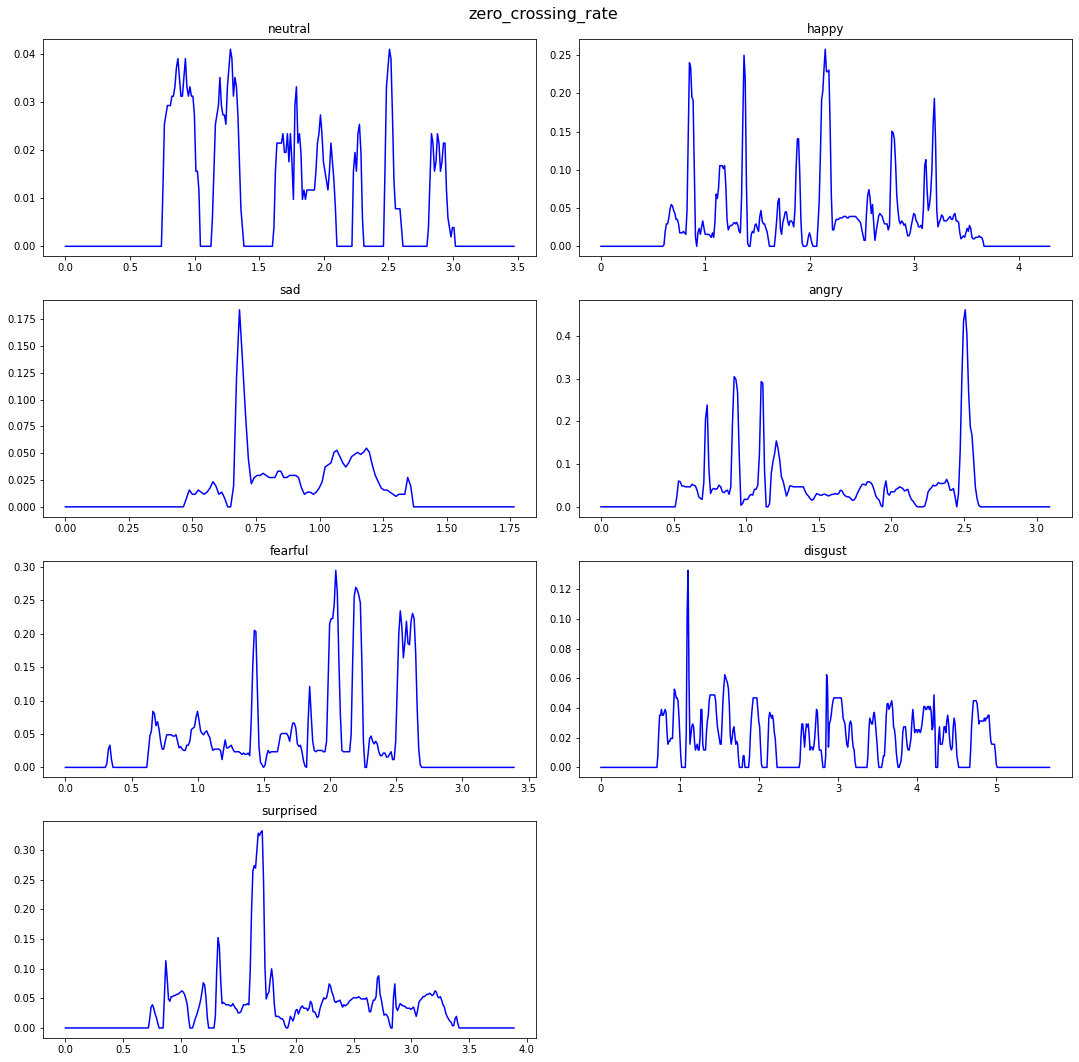

In [21]:

plt.figure(figsize=(15, 15))

for x in range(len(viz_normal)):
    plt.subplot(4,2,x+1)    
    
    crossing = librosa.feature.zero_crossing_rate(y=viz_normal[x]["audio"], frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)
    
    frames = range(len(crossing[0]))
    t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
    plt.plot(t, crossing[0], color="b")

    plt.title(viz_normal[x]["emotion"])

plt.suptitle("zero_crossing_rate", size=16);
plt.tight_layout()
plt.savefig("./image/savee_zero_crossing_rate.png")



# Mel Spectogram

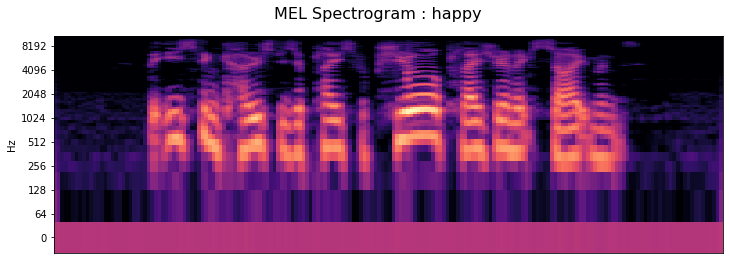

In [42]:
plt.figure(figsize=(12,4))

mel_features = librosa.feature.melspectrogram(y=viz_normal[1]["audio"], sr=viz_normal[x]["sr"])
log_mel_features = librosa.power_to_db(mel_features, ref=np.max)
img = librosa.display.specshow(log_mel_features, y_axis="log")
plt.suptitle(f"MEL Spectrogram : {viz_normal[1]['emotion']}", size=16);
          

## Mel frequency cepstral coefficients (MFCC)


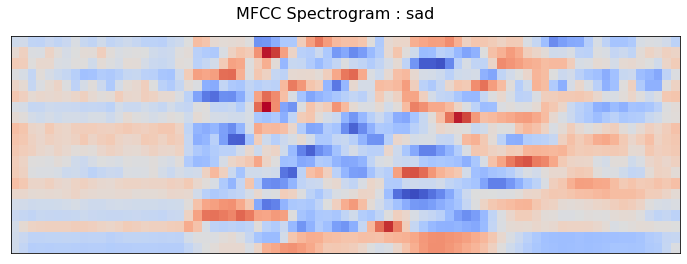

In [44]:
plt.figure(figsize=(12,4))

mfccs = librosa.feature.mfcc(y=viz_normal[2]["audio"], sr=viz_normal[x]["sr"])
mfccs = scale(mfccs, axis=1)
librosa.display.specshow(mfccs, sr=viz_normal[x]["sr"])

plt.suptitle(f"MFCC Spectrogram : {viz_normal[2]['emotion']}", size=16);
plt.savefig("./image/savee_mfcc.png")